# Boolean Network Modeling

Boolean network models are a mathematical modeling framework for exploring the behavior of dynamical systems.  In a Boolean network model we make the simplifying assumption that the variables of interest (e.g. genes, proteins, species, etc) can take two states (e.g. off/on, present/absent, repressed/activated) which are modeled as False/True or 0/1 states.  The dynamics of the variables in Boolean network models are determined by Boolean updating functions -- i.e. changes in the state of a variable are determined by Boolean functions of  other variables in the system. 

Modeling the statements of systems as Boolean variables clearly is a coarse approach for modeling many systems of interest, but such models are relatively simple to compute and can be adopted to quite large systems.  Despite their simplicity Boolean networks can quite useful for gaining insight about the possible behaviors of dyanamical systems. For example, a common application is to explore the propensity of systems toward to undergo oscillations or to head towards particular steady states. 

Boolean network modeling finds applications in biological subfields like systems biology, ecology, epidemiology, among others.


Some useful references and examples:

* Wang RS, Saadatpour A, Albert R. "Boolean modeling in systems biology: an overview of methodology and applications". *Phys Biol.* 2012 Oct;9(5):055001. PubMed PMID: 23011283  [DOI link](http://dx.doi.org/10.1088/1478-3975/9/5/055001).

* Orlando DA, Lin CY, Bernard A, Wang JY, Socolar JE, Iversen ES, Hartemink AJ, Haase SB. Global control of cell-cycle transcription by coupled CDK and network oscillators. Nature. 2008 Jun 12;453(7197):944-7. doi: 10.1038/nature06955. Epub 2008 May 7. PMID: 18463633; PMCID: PMC2736871. -- **An example from Steve Haase's lab.**


## Boolean logic: core operations 

Boolean algebra is the mathematical subfield that deals with the algebraic structure of Boolean variables (True/False or 0/1) and logical operators.

The core logical operations are:

* Conjunction (AND): written  $x \wedge y$ -- evaluates to True if **both** $x$ and $y$ are True, otherwise False
* Disjunction (OR): written  $x \vee y$ -- evaluates to True if **either** $x$ and $y$ are True, otherwise False
* Negation (NOT): written $\neg x$ -- evalutes to True if $x$ is False; otherwise False

More complex Boolean operations can be represented in terms of these core operations. A "Boolean function" is a function that take as input Boolean values and applies a composition of Boolean operatorions to those values to produce a Boolean output.

Python has built-in support for [Boolean types](https://docs.python.org/3/library/stdtypes.html#boolean-type-bool) and supports the [logic operaterions](https://docs.python.org/3/library/stdtypes.html#boolean) `and`, `or`, and `not` on those types. Here are a few examples:


In [7]:
# Python Boolean types
x = True
y = False

In [9]:
type(x)

bool

In [10]:
x and y

False

In [11]:
x or y

True

In [12]:
not x

False

In [13]:
not y

True

In [15]:
(not x) and y

False

In [16]:
def bool_func1(x, y):
    "Return True if x is False and y is True"
    return (not x) and y

def bool_func2(x, y, z):
    "Return True if x and y are True and Z is False"
    return (x and y) and (not z)


In [17]:
bool_func1(True, True)

False

In [19]:
bool_func2(True, True, False)

True


## Building Boolean network models


We're going to build a simple Python simulation framework for exploring a Boolean network model, by showing how to implement the model shown below which is taken from the Wang et al. (2012) paper.  We'll explore how different starting conditions and different updating rules (synchronous vs. asynchronous) affect the dynamics of the system.

This particular example is meant to illustrate the type of examples often encountered when modeling gene or protein networks, and the arrows below indicate activating and repressive interactions. For example, we could read the figure on the left as saying that $V_1$ activates itself and is repressed by $V_3$, while $V_2$ is positively regulated by both $V_1$ and $V_3$. $V_3$ is activated by $V_2$ alone.  

The topology of the figure on the left tells us about the connections in the system but to implement a model we also need to define the specific **Boolean functions** that determine how the model updates. In this particular figures, you can interpret each function $B_i$ as specifying how the state of the corresponding variable $V_i$ changes in response to the states of it's inputs.  Where does these functions come from? You as the modeler typically hypothesize them based on empirical data derived from the system your modeling. Alternately, if you only know some coarse aspects of the topology of the network you might use Boolean network modeling to explore different Boolean functions to test which ones best mimic the actual behavior of the system of interest.


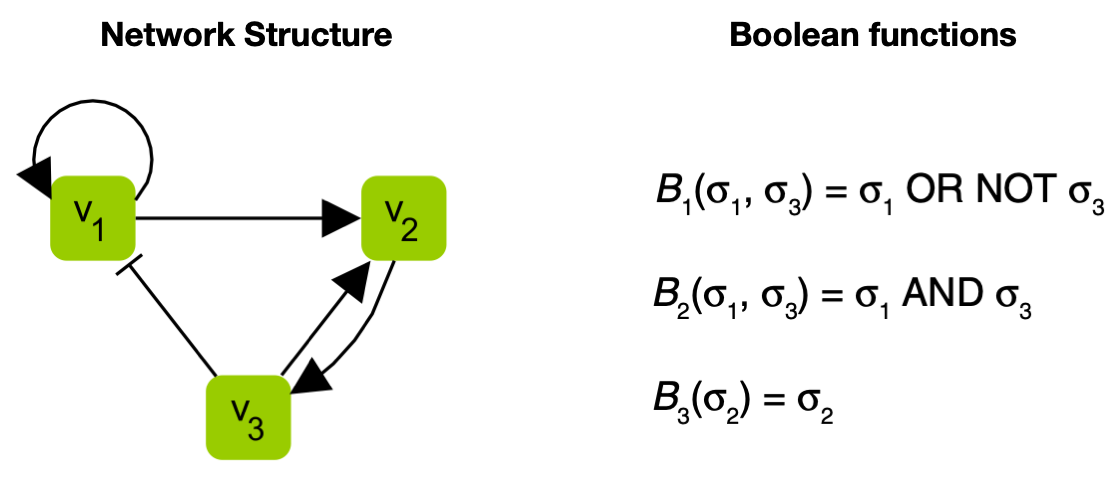

## Libraries

In [32]:
import random
import numpy as np
from matplotlib import pyplot as plt

## Define the logic functions

In [14]:
# Write functions, B1, B2, and B3 to represent the Boolean logic
# in the figure above 


def B1(v1, v3):
    return v1 or (not v3)

def B2(v1, v3):
    return v1 and v3

def B3(v2):
    return v2


## Core of the simulation

Having defined the Boolean updating functions for the network, we'll use lists to track the state of each node (variable) in the network and write a for-loop to implement the updating of the system state over time. 

Notice that the network topology (the edges between the nodes) is implicit in terms of the arguments to the Boolean updating functions, so to faithfully represent the network we need to make sure we're calling each function with the right inputs.

In [34]:
# This is a "synchronous model" because each node gets updated 
# at every "tick" of the simulation clock, and the new state of each node at
# time t_n depends only on the state of the network in the previous time step (t_{n-1})

# We're going to track the state of each variable in the model with lists
# The first element in each list represents the initial state of the system
V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    # get the current state of the variables
    v1now = V1[-1]
    v2now = V2[-1]
    v3now = V3[-1]
    
    # find updated states by applying the corresponding Boolean fxns
    v1new = B1(v1now, v3now)
    v2new = B2(v1now, v3now)
    v3new = B3(v2now)
    
    # update our history of the states of system
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)


pass

That's it!  At the end of our simulation we have a set of lists, filled with True / False values as shown below

In [35]:
# The lists holding the states of each variable, each entry is a point in
# our simulation time
print("V1:", V1)
print("V2:", V2)
print("V3:", V3)

V1: [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
V2: [True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True]
V3: [False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]


Since it's  hard to understand what's going on when the simulation data is presented like that, let's generate a plot and see if we can make sense of the dynamics generated.

([<matplotlib.axis.YTick at 0x122060310>,
 [Text(0, 0, 'V1'), Text(0, 1, 'V2'), Text(0, 2, 'V3')])

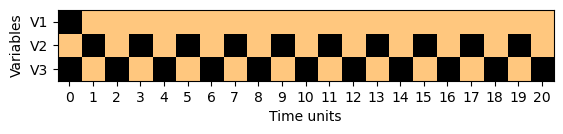

In [36]:
# First, we combine the individual lists representing each variable
# into an array (from the numpy package) to make plotting simpler
# Numpy arrays are homogenous -- i.e. all the data in the array has to be of the same type 
# Here the resulting array, V123, is an array of Boolean's
V123 = np.array([V1,V2,V3])

# Then we draw an image representation of the array
plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])



The image above represents the dynamics of the system over time. Each row represents one of the variables. Each column is a discrete time point in the simulation (time increases to the right). Black  indicates off states of variables, yellow squares indicate on states. 

In this particular simulation run, V1 went to the on (True) state and then just stayed on. However, V2 and V3 alternate between off (False) and on (True) states.  The system as a whole reaches an oscillatory attractor (repeating set of states) from the given starting condition.

### Changing the starting conditions

In the example above, we explored the dynamics of the model given one particular initial condition. We can change initial conditions to see how the model behaves given new initial conditions.

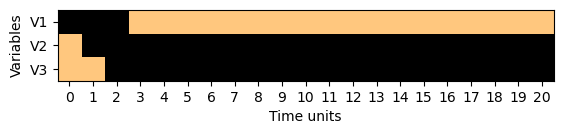

In [37]:
# synchronous model, different starting conditions
V1 = [False]
V2 = [True]
V3 = [True]

nsteps = 20

for i in range(nsteps):
    # get the current state of the variables
    v1now = V1[-1]
    v2now = V2[-1]
    v3now = V3[-1]
    
    # find updates
    v1new = B1(v1now, v3now)
    v2new = B2(v1now, v3now)
    v3new = B3(v2now)
    
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass

In this second example, V1 goes on and stays on, while V2 and V3 reach off states and stay off. This is a case of the system reaching a "fixed point" attractor (single state which never changes). That is, once it has reached the state [on, off, off], the state of the system will never change.

## Asynchronous updating

Another way to run Boolean simulations is to use asynchronous updating of the nodes.  Asynchronous updating is useful for represent phenomena such stochasticity in  network interactions, or network interactions that operate on different time scales.

The simulations below that include stochastic elements (e.g. randomly picking a node to update or updating nodes with a given probability) can produce different outputs each time they're run so try running the same simulation repeatedly.

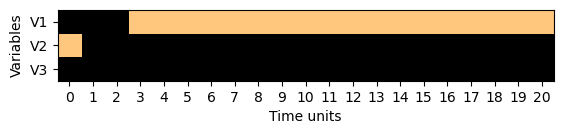

In [38]:
# Asynchronous updating, random node chosen to update

V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]
    
    # by default keep everything the same
    v1new, v2new, v3new = v1now, v2now, v3now
    
    # randomly pick a node to update
    # if/else statements are setup so only one random node will update
    # in each time step, hence the simulation is asynchronous
    toupdate = random.choice([1,2,3])
    if toupdate == 1:
        v1new = B1(v1now, v3now)
    elif toupdate == 2:
        v2new = B2(v1now, v3now)
    else:
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass


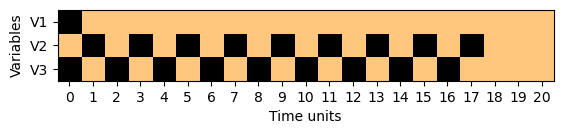

In [39]:
# Asynchronous updating, random probability of each node updating

V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]
    v1new, v2new, v3new = v1now, v2now, v3now

    # probability of updating is relatively high, so on average
    # like synchronous network, but with some element of stochasticity
    if random.random() < 0.95:
        v1new = B1(v1now, v3now)
    if random.random() < 0.95:
        v2new = B2(v1now, v3now)
    if random.random() < 0.95:
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass

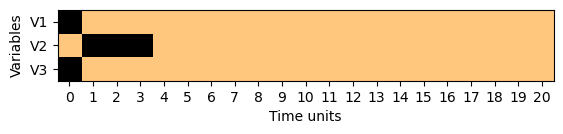

In [40]:
## Asynchronous updating, deterministic, time scale varies

V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]
    v1new, v2new, v3new = v1now, v2now, v3now
                    
                     # update v1 every 1 steps
    if i % 1 == 0:   # % is the modulo operator in python, look it up if you don't understand it!
        v1new = B1(v1now, v3now)
        
    if i % 3 == 0:   # update v2 every 3 steps
        v2new = B2(v1now, v3now)
        
    if i % 5 == 0:   # update v3 every 5 steps
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass

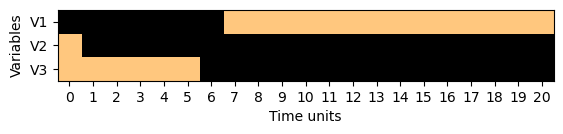

In [41]:
## Asynchronous updating, deterministic, time scale varies
## different starting conditions

V1 = [False]
V2 = [True]
V3 = [True]

nsteps = 20

for i in range(nsteps):
    # take a snapshot
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]

    # find updates
    v1new, v2new, v3new = v1now, v2now, v3now
                    
                     # update v1 every 1 steps
    if i % 1 == 0:   # % is the modulo operator in python, look it up if you don't understand it!
        v1new = B1(v1now, v3now)
        
    if i % 3 == 0:   # update v2 every 3 steps
        v2new = B2(v1now, v3now)
        
    if i % 5 == 0:   # update v3 every 5 steps
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass